In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group4/"

sif_output = "../../sif_files/Group4/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [5]:
group4 = data["G4"].dropna()

In [6]:
group4 = group4.to_list()

# Creating a Network starting from All Omnipath interactions

In [7]:
group4_net = Network(group4, resources = omnipath)

Error: node PRDM6 is not present in the resources database
Error: node KBTBD4 is not present in the resources database
Error: node EOMES is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node LMX1A is not present in the resources database
Error: node UNCX is not present in the resources database


In [8]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2D,O14686,NaN
1,KMT2C,Q8NEZ4,NaN
2,KDM6A,O15550,NaN
3,ZMYM3,Q14202,NaN
4,MED12,Q93074,NaN
5,GFI1B,Q5VTD9,NaN
6,MYCN,P04198,NaN
7,OTX2,P32243,NaN
8,ZIC1,Q15915,NaN
9,GFI1,Q99684,NaN


In [9]:
%%time
group4_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 9.25 s, sys: 2.91 ms, total: 9.25 s
Wall time: 9.25 s


In [10]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2D,O14686,NaN
1,KMT2C,Q8NEZ4,NaN
2,KDM6A,O15550,NaN
3,ZMYM3,Q14202,NaN
4,MED12,Q93074,NaN
...,...,...,...
67,CEBPB,P17676,NaN
68,CREB1,P16220,NaN
69,LEF1,Q9UJU2,NaN
70,TLE1,Q04724,NaN


In [11]:
group4_net.edges

,source,target,Type,Effect,References
0,O14686,P03372,None,stimulation,HPRD:16603732;SIGNOR:16603732;SPIKE_LC:1660373...
1,P03372,P24385,None,stimulation,HPRD:11073968;HPRD:9039267;Lit-BM-17:16061635;...
2,P24385,Q00534,None,stimulation,HPRD:11739795;HPRD:15232106;HPRD:17517622;HPRD...
3,P03372,COMPLEX:P27986_P42336,None,stimulation,SIGNOR:16169518; SIGNOR:16169518
4,COMPLEX:P27986_P42336,P31749,None,stimulation,SIGNOR:15829723; SIGNOR:15829723
...,...,...,...,...,...
136,P00533,P35222,None,bimodal,ACSN:12040186;ACSN:14585353;ACSN:17496910;ACSN...
137,P24941,P17676,None,stimulation,KEA:17570479;ProtMapper:17601773;ProtMapper:20...
138,P16220,P35222,None,stimulation,SignaLink3:10775268;SignaLink3:23331499
139,P46531,P48431,None,stimulation,SPIKE:17537801;SPIKE_LC:17537801


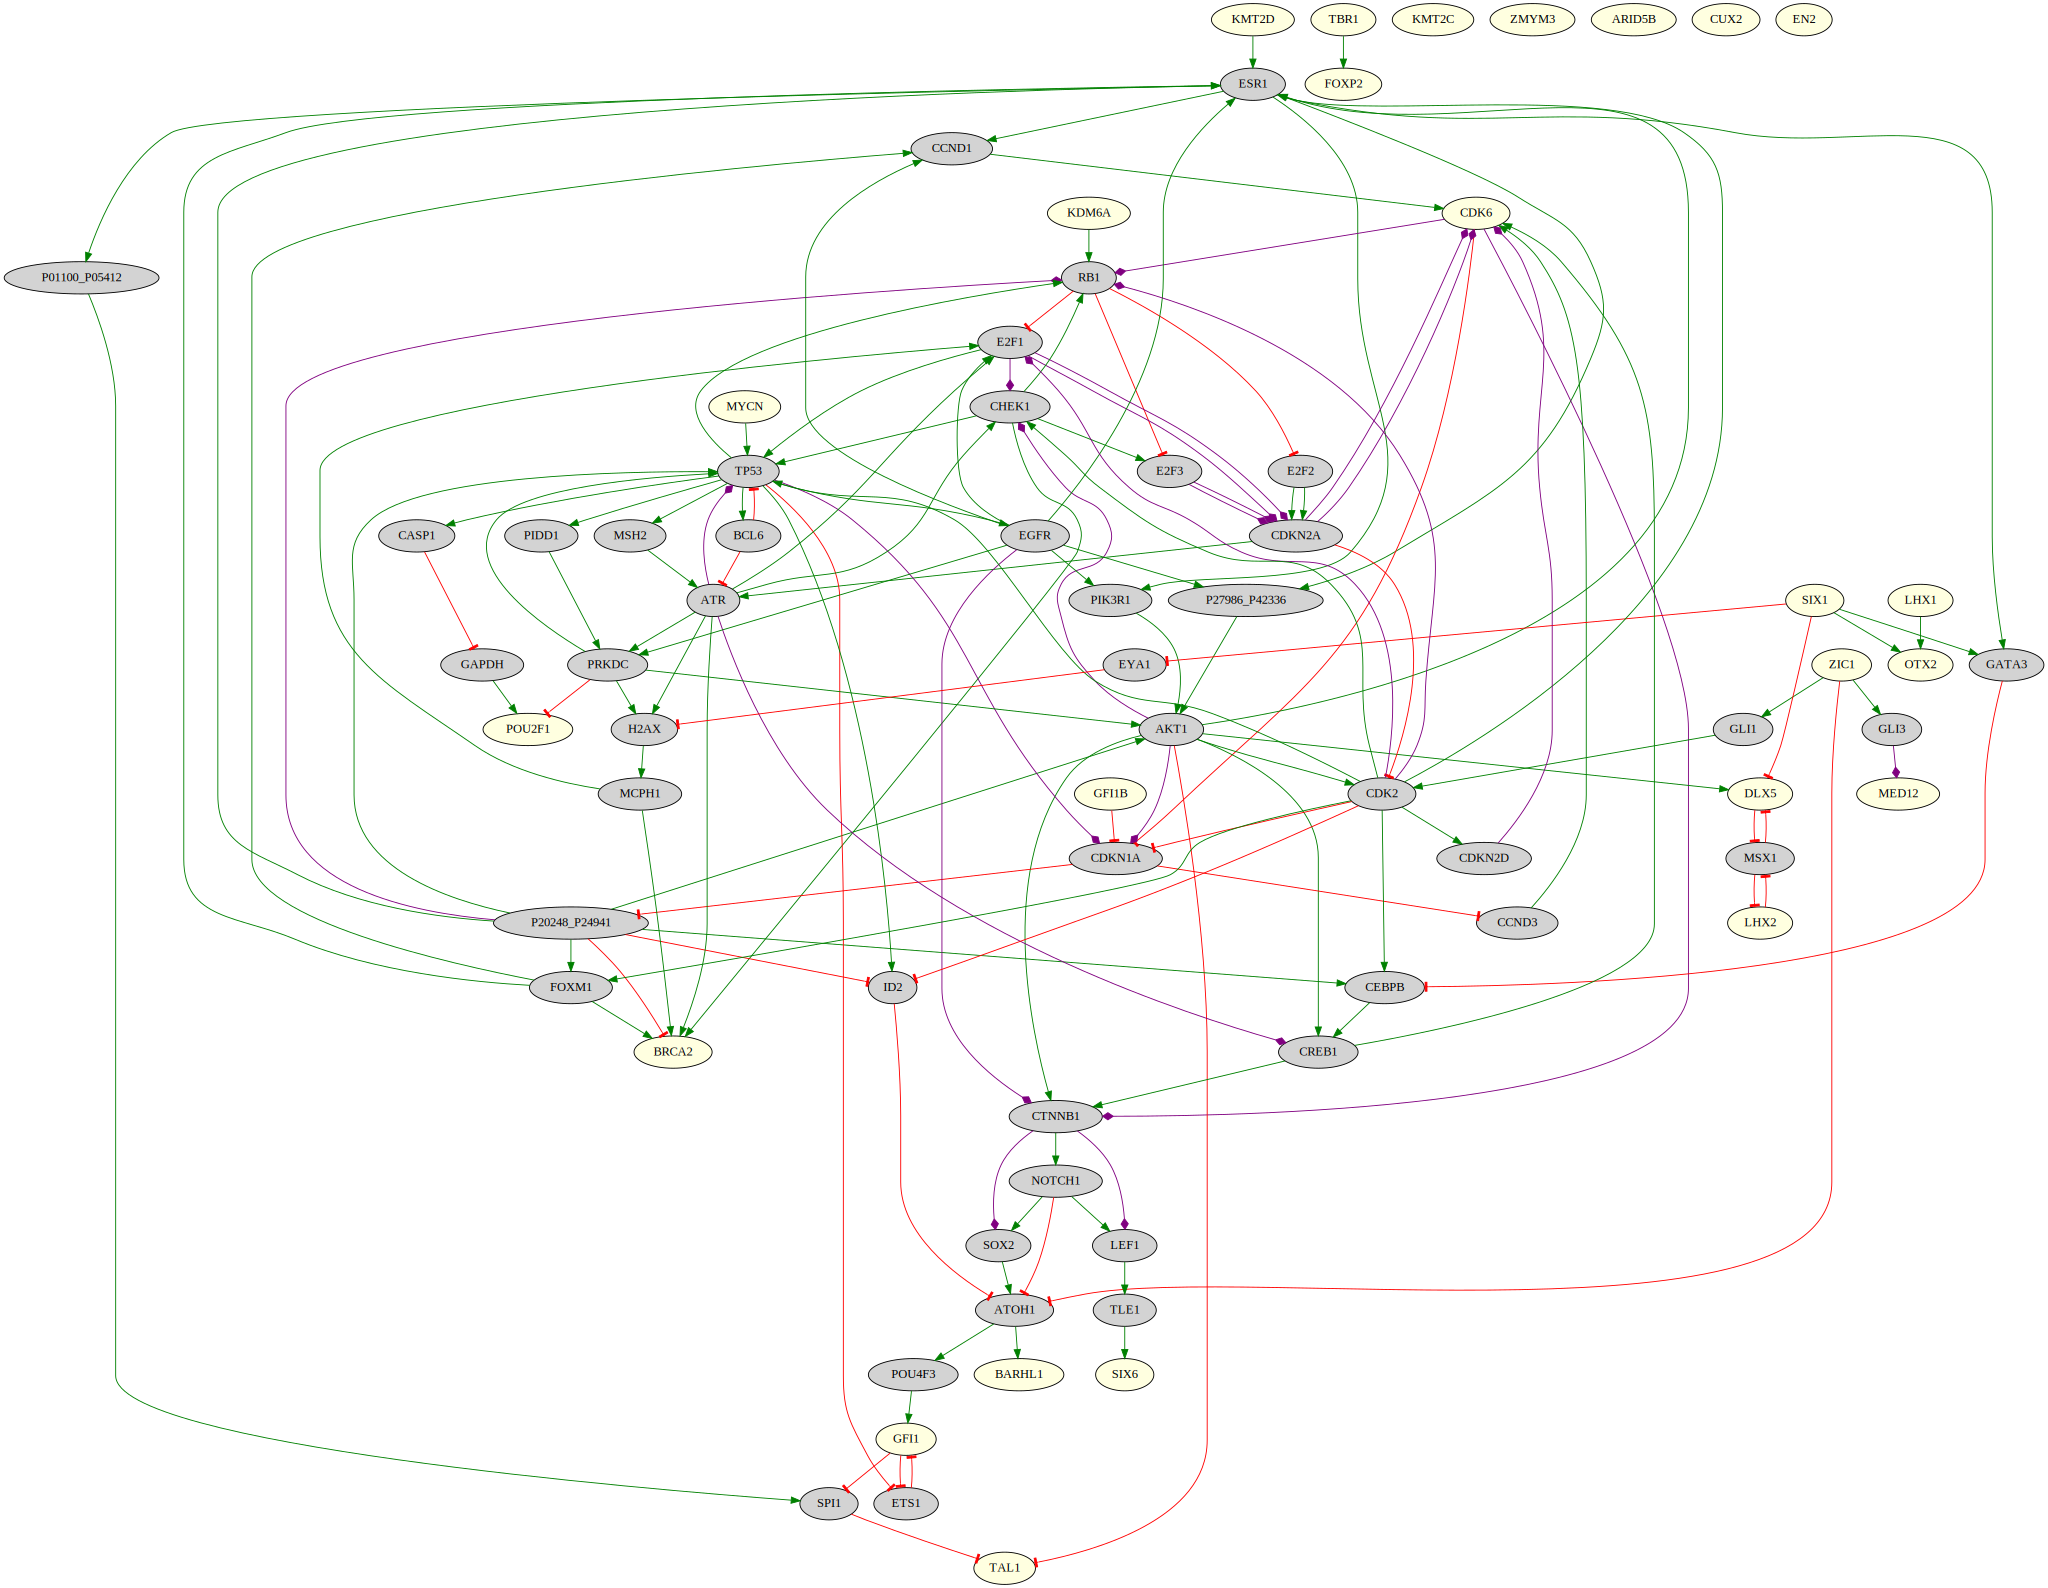

In [12]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect', noi=True)
output = figures_folder + "Group4_omnipath_Northcott"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [13]:
from neko._outputs.exports import Exports

In [14]:
for node in group4_net.nodes["Uniprot"]:
    if group4_net.edges[group4_net.edges["source"].isin([node])].empty and group4_net.edges[group4_net.edges["target"].isin([node])].empty:
        print(group4_net.nodes[group4_net.nodes["Uniprot"] == node])
        group4_net.remove_node(node[0])

  Genesymbol Uniprot Type
1      KMT2C  Q8NEZ4  NaN
  Genesymbol Uniprot Type
3      ZMYM3  Q14202  NaN
   Genesymbol Uniprot Type
13     ARID5B  Q14865  NaN
   Genesymbol Uniprot Type
15       CUX2  O14529  NaN
   Genesymbol Uniprot Type
17        EN2  P19622  NaN


In [15]:
export = Exports(group4_net)

In [16]:
export.export_sif(sif_output + "Group4_omnipath_Northcott.sif")